In [1]:
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt

More tutorials on opencv can be found:

https://docs.opencv.org/master/d2/d96/tutorial_py_table_of_contents_imgproc.html

In [2]:
path = "spheres.png"

Load the input image (whose path was supplied via command line argument) and display the image to our screen

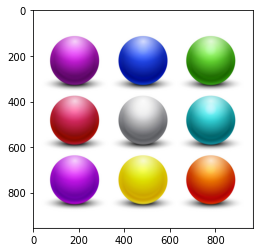

In [3]:
bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)
image = cv2.merge([r,g,b])
plt.imshow(image)

Convert the image to grayscale

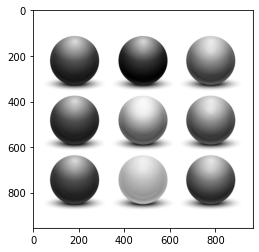

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray')

Applying edge detection we can find the outlines of objects in images


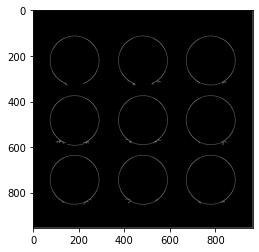

In [5]:
edged = cv2.Canny(gray, 30, 150)
plt.imshow(edged, cmap='gray')

Threshold the image by setting all pixel values less than 225 to 255(white; foreground) and all pixel values >= 225 to 255 (black; background), thereby segmenting the image.

This can be tweeked so say all pixel values less than 128.

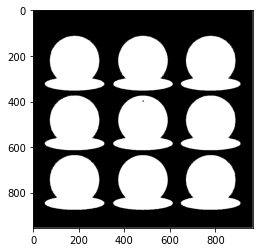

In [6]:
threshold = 250
threshold_value = 255
thresh = cv2.threshold(gray, threshold, threshold_value, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh, cmap='gray')

Find contours (i.e., outlines) of the foreground objects in the thresholded image

In [7]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()
len(cnts)

264

Loop over the contours

264

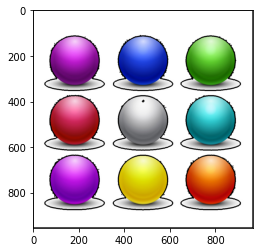

In [8]:
for c in cnts:
    # draw each contour on the output image with a 3px thick black outline
    cv2.drawContours(output, [c], -1, (0, 0, 0), 3)
plt.imshow(output)
len(cnts)

Draw the total number of contours found in purple

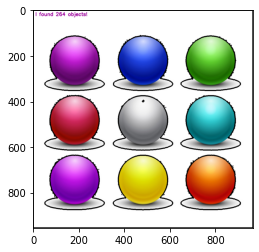

In [9]:
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (155, 0, 155), 2)
plt.imshow(output)

We apply erosions to reduce the size of foreground objects

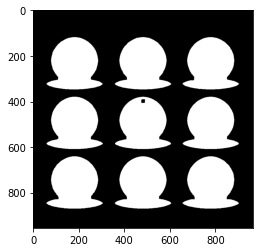

In [10]:
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations = 5)
plt.imshow(mask, cmap = 'gray')

Similarly, dilations can increase the size of the ground objects

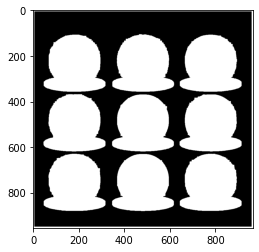

In [11]:
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations = 5)
plt.imshow(mask, cmap='gray')

A typical operation we may want to apply is to take our mask and apply a bitwise AND to our input image, keeping only the masked regions

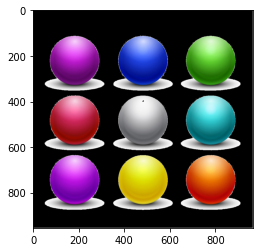

In [12]:
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(output)

# Ex 2
    A) Can you remove the yellow square from the image?
    B) Go through the tutorial but with the "spheres.png" image. (replace tetris_blocks with spheres.png)
    C) Tweak the parameters of the thresholding can you threshold all the spheres?
    D) Can you remove the red sphere?
    C) Can you remove the green?

[[[ 60 255 255]]]
[[[  0 255 255]]]


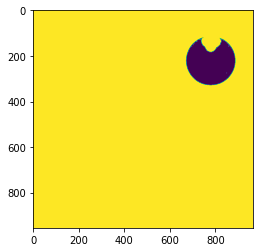

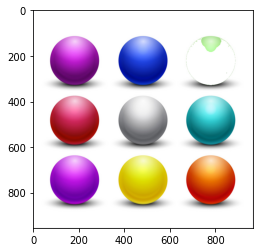

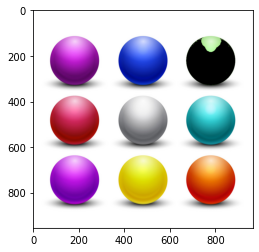

In [13]:
bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)
image = cv2.merge([r,g,b])

greenBGR = np.uint8([[[0,255,0]]])
hsv_green = cv2.cvtColor(greenBGR,cv2.COLOR_BGR2HSV)
print(hsv_green)
redBGR = np.uint8([[[0,0,255]]])
hsv_red = cv2.cvtColor(redBGR,cv2.COLOR_BGR2HSV)
print(hsv_red)

low_green = np.array([40, 100, 100])
high_green = np.array([70, 255, 255])
# convert BGR to HSV
imgHSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# create the Mask
mask = cv2.inRange(imgHSV, low_green, high_green)
# inverse mask
mask = 255-mask
res = cv2.bitwise_and(image, image, mask=mask)

imask = mask==0
white = np.full_like(image, 255, np.uint8)
image[imask] = white[imask]

plt.figure(1)
plt.imshow(mask)
plt.figure(2)
plt.imshow(image)
plt.figure(3)
plt.imshow(res)